In [1]:
import tensorflow as tf
import cv2
import numpy as np
import time
import pygetwindow as gw
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from PIL import ImageGrab
import os

In [2]:
def take_and_save_screenshot(folder_path, screenshot_size=(180, 250), window_title='ELDEN RING™', file_name='ELDEN RING™'):
    # Find the window by title (window_title)
    window = gw.getWindowsWithTitle(window_title)[0]

    if window:
        # Get the window's position and size
        left, top, right, bottom = window.left, window.top, window.right, window.bottom

        # Calculate the width and height of the specified area
        width = right - left
        height = bottom - top

        # Calculate the coordinates of the top right area
        area_percentage = (0.88, 0.25)
        x1 = int(left + area_percentage[0] * width)
        y1 = int(top + 0.02 * width)
        x2 = int(left + width * (1 - 0.02))
        y2 = int(top + area_percentage[1] * height)

        # Capture the screenshot for the specified area
        screenshot = ImageGrab.grab(bbox=(x1, y1, x2, y2))

        # Resize the screenshot to the fixed size
        screenshot_resized = screenshot.resize(screenshot_size)

        # Create the folder if it doesn't exist
        os.makedirs(folder_path, exist_ok=True)

        # Save the screenshot in the specified folder with a unique name
        screenshot_path = os.path.join(folder_path, f'{file_name}.png')
        screenshot_resized.save(screenshot_path)

        return screenshot_path
    else:
        return None

In [9]:
# Get data for outside the map menu

if __name__ == "__main__":

    # Create a directory to save the training data
    window_title = 'ELDEN RING™'
    num_samples = 300*8 # Set the number of samples you want to collect
    folder_path = os.path.join('Data','CNN_train_MapOff_robust')

    for i in tqdm(range(num_samples)):
        if i%300==0 and i>0:
            print("Change Resolution")
            time.sleep(7)
            # Take a screenshot with 50% of the original resolution and store it in memory
            take_and_save_screenshot(folder_path, screenshot_size=(180, 250), window_title='ELDEN RING™',file_name=f"MapFalse_{i+1}")
        else:
            take_and_save_screenshot(folder_path, screenshot_size=(180, 250), window_title='ELDEN RING™',file_name=f"MapFalse_{i+1}")

    print(f"{num_samples} samples saved for training.")

 12%|█▎        | 300/2400 [00:16<01:55, 18.21it/s]

Change Resolution


 25%|██▌       | 600/2400 [00:40<01:50, 16.33it/s]

Change Resolution


 38%|███▊      | 900/2400 [01:06<01:29, 16.71it/s]

Change Resolution


 50%|█████     | 1200/2400 [01:32<01:17, 15.44it/s]

Change Resolution


 62%|██████▎   | 1500/2400 [01:58<00:53, 16.68it/s]

Change Resolution


 75%|███████▌  | 1800/2400 [02:19<00:24, 24.04it/s]

Change Resolution


 88%|████████▊ | 2100/2400 [02:42<00:12, 23.31it/s]

Change Resolution


100%|██████████| 2400/2400 [03:13<00:00, 12.43it/s]

2400 samples saved for training.


In [10]:
# Get data for inside the map menu

if __name__ == "__main__":

    # Create a directory to save the training data

    window_title = 'ELDEN RING™'
    num_samples = 300*8  # Set the number of samples you want to collect
    folder_path = os.path.join('Data','CNN_train_MapOn_robust')

    for i in tqdm(range(num_samples)):
        if i%300==0 and i>0:
            print("Change Resolution")
            time.sleep(11)
            # Take a screenshot with 50% of the original resolution and store it in memory
            take_and_save_screenshot(folder_path, screenshot_size=(180, 250), window_title='ELDEN RING™',file_name=f"MapTrue_{i+1}")
        else:
            take_and_save_screenshot(folder_path, screenshot_size=(180, 250), window_title='ELDEN RING™',file_name=f"MapTrue_{i+1}")

    print(f"{num_samples} samples saved for training.")

 12%|█▎        | 300/2400 [00:20<02:13, 15.75it/s]

Change Resolution


 25%|██▌       | 600/2400 [00:50<01:47, 16.81it/s]

Change Resolution


 38%|███▊      | 900/2400 [01:21<01:31, 16.46it/s]

Change Resolution


 50%|█████     | 1200/2400 [01:50<01:12, 16.62it/s]

Change Resolution


 62%|██████▎   | 1500/2400 [02:19<00:52, 17.22it/s]

Change Resolution


 75%|███████▌  | 1800/2400 [02:48<00:33, 17.87it/s]

Change Resolution


 88%|████████▊ | 2100/2400 [03:18<00:18, 16.48it/s]

Change Resolution


100%|██████████| 2400/2400 [03:46<00:00, 10.59it/s]

2400 samples saved for training.


# Now that we have the data

In [11]:
data_dir = 'Data'
image_ext = 'png'

In [12]:
os.listdir(os.path.join(data_dir,'CNN_train_MapOff_robust'))[0:5] #check if I can access the files

['MapFalse_1.png',
 'MapFalse_10.png',
 'MapFalse_100.png',
 'MapFalse_1000.png',
 'MapFalse_1001.png']

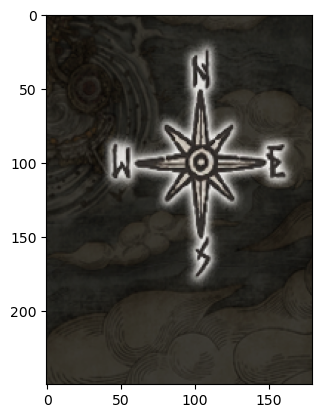

In [13]:
#Example of an image inside the map menu

img = cv2.imread(os.path.join('Data','CNN_train_MapOn_robust','MapTrue_1.png'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

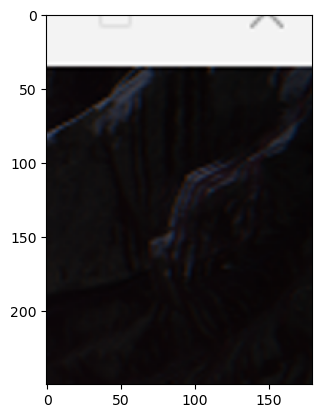

In [14]:
#Example of an image outside the map menu
img = cv2.imread(os.path.join('Data','CNN_train_MapOff_robust','MapFalse_1.png'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# Load Data

In [26]:
data = tf.keras.utils.image_dataset_from_directory('Data') #this is building our data pipeline, separates automatically into 2 classes

Found 4782 files belonging to 2 classes.


In [27]:
data_iterator = data.as_numpy_iterator() #allows to loop through the data pipeline

In [28]:
batch = data_iterator.next() #how to iterate

In [29]:
batch[0].shape  #These represent the features, we have a batchsize of 32, with 256x256 pixels and 3 specifies 3 color values

(32, 256, 256, 3)

In [30]:
batch[1] #These represent the labels

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

checking which class is assigned to which type of image

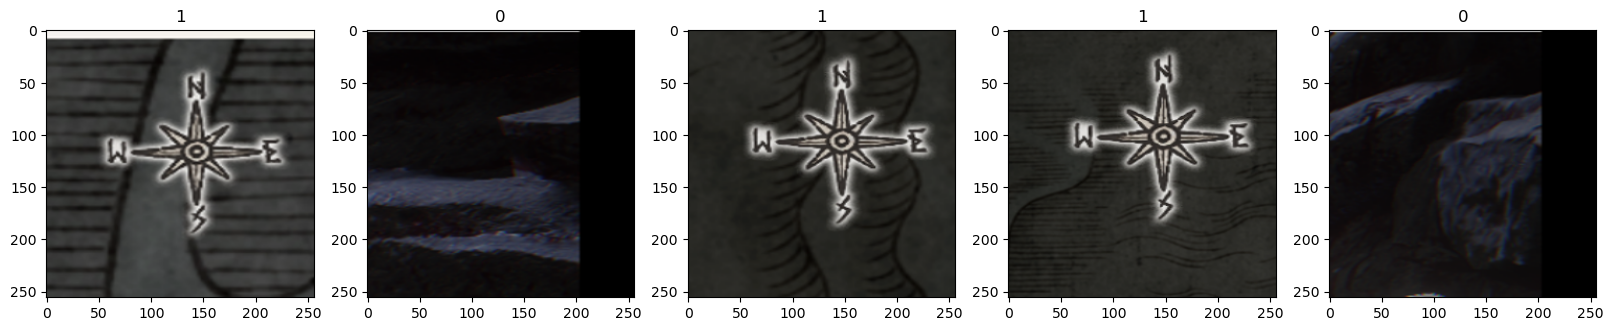

In [32]:
fig, ax = plt.subplots(ncols = 5,figsize = (20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# We can see by the title of the images that 1 is inside the map, and 0 is outside the map

#Class 0 = outside map
#Class 1 = inside map

In [33]:
data = data.map(lambda x,y: (x/255,y)) #this will divide all features by 255 to scale them between 0 and 1. the y obviously we do not do any transformation

In [34]:
data.as_numpy_iterator().next()[0].max()

1.0

In [35]:
len(data) #we have 188 batches

150

In [38]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2) 
test_size = int(len(data)*0.1)

In [39]:
# Dividing the data into train, validation and test

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Deep Learning Model

In [40]:
# This model is a complete overkill, probably I did not need such a powerful model for this simple recognition task but hey, whatever

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3))) #the first layer is an input layer, has 16 filters, 3 pixels by 3 pixels in size, with a stride of 1, moving a pixel each stride
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [41]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [43]:
# getting a log directory

logdir = 'logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [45]:
# Training the model

hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
105/105 [==============================] - 76s 705ms/step - loss: 0.0509 - accuracy: 0.9768 - val_loss: 9.0869e-04 - val_accuracy: 1.0000
Epoch 2/20
105/105 [==============================] - 68s 640ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 4.7601e-05 - val_accuracy: 1.0000
Epoch 3/20
105/105 [==============================] - 67s 631ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 7.6151e-05 - val_accuracy: 1.0000
Epoch 4/20
105/105 [==============================] - 67s 639ms/step - loss: 5.0193e-04 - accuracy: 0.9997 - val_loss: 1.2162e-05 - val_accuracy: 1.0000
Epoch 5/20
105/105 [==============================] - 68s 645ms/step - loss: 2.1658e-04 - accuracy: 1.0000 - val_loss: 1.1938e-05 - val_accuracy: 1.0000
Epoch 6/20
105/105 [==============================] - 68s 639ms/step - loss: 9.0720e-05 - accuracy: 1.0000 - val_loss: 2.4808e-05 - val_accuracy: 1.0000
Epoch 7/20
105/105 [==============================] - 66s 622ms/step - loss: 2.5000e-05 - accu

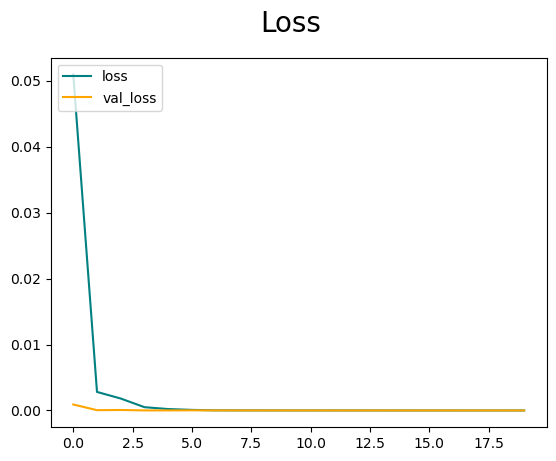

In [46]:
#plotting loss

fig = plt.figure()

plt.plot(hist.history['loss'],color='teal',label = 'loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

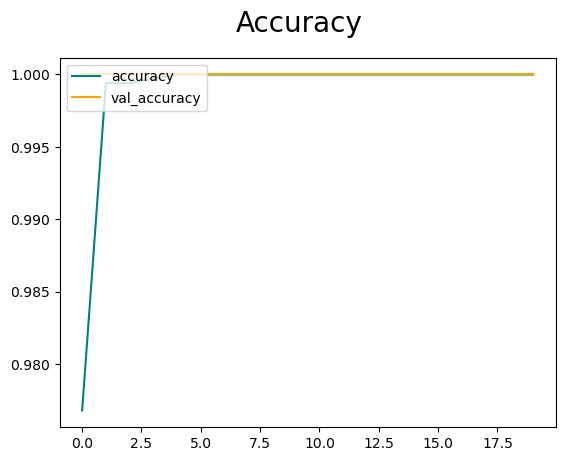

In [47]:
#plotting accuracy

fig = plt.figure()

plt.plot(hist.history['accuracy'],color='teal',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

### Evaluate model performance

In [48]:
from tensorflow.keras.metrics import Precision,Recall, BinaryAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [50]:
len(test)

15

In [51]:
for batch in test.as_numpy_iterator():
    X,y = batch
    y_pred = model.predict(X)
    
    pre.update_state(y,y_pred)
    re.update_state(y,y_pred)
    acc.update_state(y,y_pred)


1/1 [==============================] - 0s 173ms/step


In [52]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


# test on images with different resolutions

In [ ]:


img = cv2.imread(imgname)
plt.imshow(cv2.cvtColor(img,cv2.COLOR.BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
y_hat = model.predict(np.expand_dims(resize/255,0 )) # The neural net expects us to give a batch of images, not a single image, therefore we have to do this. This basically places it into another set of arrays like if it was a batch
y_hat

# Saving the model

In [53]:
from tensorflow.keras.models import load_model

In [54]:
model.save(os.path.join('models','insideMapRobust.h5'))

# To reload model and test against new unseen images

In [ ]:
folder_path = os.path.join('Data',"ExtraTestImages")

In [ ]:
take_and_save_screenshot(folder_path, area_percentage=(0.88, 0.25), resize_factor=0.5, window_title='ELDEN RING™',file_name=f"ExtraTestImages_out1")

In [ ]:
take_and_save_screenshot(folder_path, area_percentage=(0.88, 0.25), resize_factor=0.5, window_title='ELDEN RING™',file_name=f"ExtraTestImages_out2")

In [ ]:
take_and_save_screenshot(folder_path, area_percentage=(0.88, 0.25), resize_factor=0.5, window_title='ELDEN RING™',file_name=f"ExtraTestImages_out3")

In [ ]:
take_and_save_screenshot(folder_path, area_percentage=(0.88, 0.25), resize_factor=0.5, window_title='ELDEN RING™',file_name=f"ExtraTestImages_in1")

In [ ]:
take_and_save_screenshot(folder_path, area_percentage=(0.88, 0.25), resize_factor=0.5, window_title='ELDEN RING™',file_name=f"ExtraTestImages_in2")

In [ ]:
take_and_save_screenshot(folder_path, area_percentage=(0.88, 0.25), resize_factor=0.5, window_title='ELDEN RING™',file_name=f"ExtraTestImages_in3")

In [ ]:
# showing the new unseen images that I gathered, i chose with different screen resolutions, and 3 inside the map and 3 outside

img1= cv2.imread(os.path.join('Data',"ExtraTestImages","ExtraTestImages_out1.png"))
img2= cv2.imread(os.path.join('Data',"ExtraTestImages","ExtraTestImages_out2.png"))
img3= cv2.imread(os.path.join('Data',"ExtraTestImages","ExtraTestImages_out3.png"))
img4= cv2.imread(os.path.join('Data',"ExtraTestImages","ExtraTestImages_in1.png"))
img5= cv2.imread(os.path.join('Data',"ExtraTestImages","ExtraTestImages_in2.png"))
img6= cv2.imread(os.path.join('Data',"ExtraTestImages","ExtraTestImages_in3.png"))

fig, ax = plt.subplots(ncols = 6,figsize = (20,20))
for idx, img in enumerate([img1,img2,img3,img4,img5,img6]):
    ax[idx].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [60]:
reloaded_model = load_model(os.path.join('models','insideMapRobust.h5'))


In [ ]:

resize = tf.image.resize(img6,(256,256))
y_hat_reloaded = reloaded_model.predict(np.expand_dims(resize/255,0 ))
print(y_hat_reloaded) # this will print a number between 0 and 1 that kind of reflects the confidence on the model when predicting. if larger than 0.5 we assume we are inside the map menu
if y_hat_reloaded>0.5:
    print(f'Predicted inside the map')
else:
    print(f'Predicted outside the map')

In [63]:
def take_screenshot_in_memory(screenshot_size=(180, 250), window_title='ELDEN RING™'):
    # Find the window by title (window_title)
    window = gw.getWindowsWithTitle(window_title)[0]

    if window:
        # Get the window's position and size
        left, top, right, bottom = window.left, window.top, window.right, window.bottom

        # Calculate the width and height of the specified area
        width = right - left
        height = bottom - top

        # Calculate the coordinates of the top right area
        area_percentage = (0.88, 0.25)
        x1 = int(left + area_percentage[0] * width)
        y1 = int(top + 0.02 * width)
        x2 = int(left + width * (1 - 0.02))
        y2 = int(top + area_percentage[1] * height)

        # Capture the screenshot for the specified area
        screenshot = ImageGrab.grab(bbox=(x1, y1, x2, y2))

        # Resize the screenshot to the fixed size
        screenshot = screenshot.resize(screenshot_size)
        # Resize the screenshot to a lower resolution
        screenshot_resized = tf.image.resize(screenshot,(256,256))

        return screenshot_resized
    else:
        return None
    
def img_prob(reloaded_model):
    # Take a screenshot with 50% of the original resolution and store it in memory
    resize = take_screenshot_in_memory(screenshot_size=(180, 250), window_title='ELDEN RING™')
    y_hat_prob = reloaded_model.predict(np.expand_dims(resize/255,0),verbose=0)
    return y_hat_prob

def isMap(reloaded_model):
    inside_prob = img_prob(reloaded_model)
    if inside_prob > 0.5:
        return True
    elif inside_prob <=0.5:
        return False


The following tells you if you are inside the map or not while playing elden ring

In [65]:
# Initialize a variable to store the previous value of Map
prev_map = None

while True:
    Map = isMap(reloaded_model)

    # Check if Map has changed from the previous iteration
    if Map != prev_map:
        print(Map)

    # Update the previous value for the next iteration
    prev_map = Map



True
False


KeyboardInterrupt: 